<a href="https://colab.research.google.com/github/DandyWahyu/Machine_Learning/blob/main/UTS/UTSMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [ ]:

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


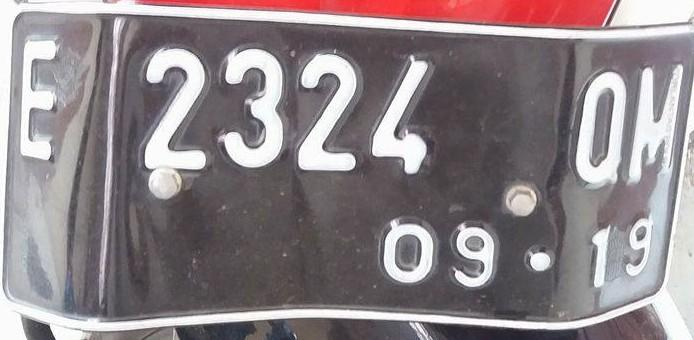

In [ ]:
# Load Gambar
img1 = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Dataset/dummy2/10.jpg')

# Tampilkan gambar
cv2_imshow(img1)

In [ ]:
h, w, ch= img1.shape
print(h)
print(w)
print(ch)

340
694
3


In [ ]:
data = img1 / 255.0
data = data.reshape(h * w, ch)
data.shape

(235960, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

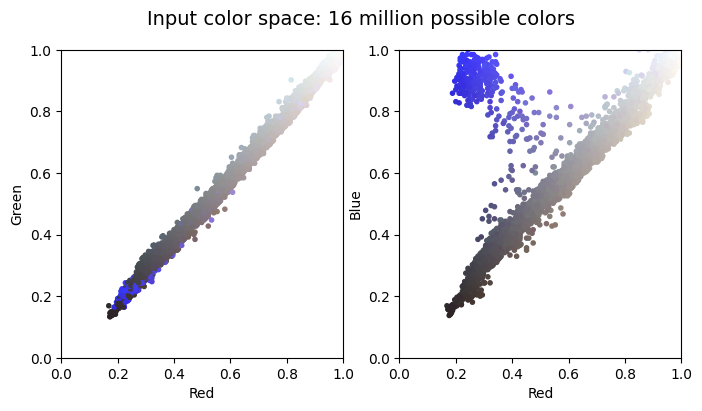

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

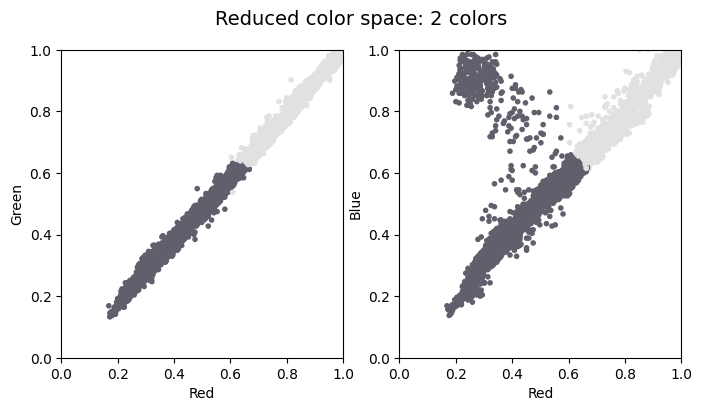

In [ ]:
# K-Means Segmentation

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 2 colors")

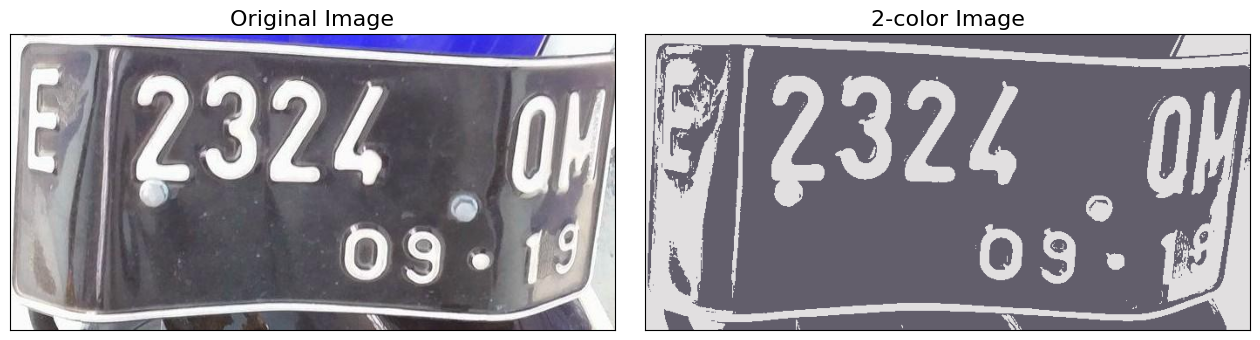

In [ ]:
from pandas.core.accessor import PandasDelegate
plate_recolored = new_colors.reshape(img1.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img1)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(plate_recolored)
ax[1].set_title('2-color Image', size=16);

# store to file
plt.savefig("lisencePlate_kmeans.png", dpi=125)